<a href="https://colab.research.google.com/github/Hengki-Setiawan/Tugas-3-Social-Media-Analysis-Fix/blob/main/T3_Analisis_Sentimen_Hengki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Memulai proses analisis sentimen...

--- Langkah 1: Memuat dan Memeriksa Data ---
File 'prabowo.csv' berhasil dimuat.
Jumlah total tweet sebelum dibersihkan: 1515
Jumlah tweet setelah menghapus duplikat dan baris kosong: 1515

--- Langkah 2: Pembersihan dan Pemrosesan Teks ---
Pembersihan teks selesai. Kolom 'cleaned_text' telah dibuat.

--- Langkah 3: Klasifikasi Sentimen (Metode Machine Learning) ---
Memuat model machine learning... Proses ini mungkin memakan waktu beberapa menit.


Device set to use cuda:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Model berhasil dimuat.
Klasifikasi sentimen untuk semua tweet selesai.

--- Langkah 4: Hasil Analisis & Visualisasi ---
Hasil Agregat Analisis Sentimen:
sentiment
Negatif    708
Netral     529
Positif    278
Name: count, dtype: int64

Persentase Sentimen:
sentiment
Negatif    46.73
Netral     34.92
Positif    18.35
Name: count, dtype: float64


/tmp/ipython-input-314384506.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#FF6B6B', '#FFD93D', '#6BCB77'], order=['Negatif', 'Netral', 'Positif'])


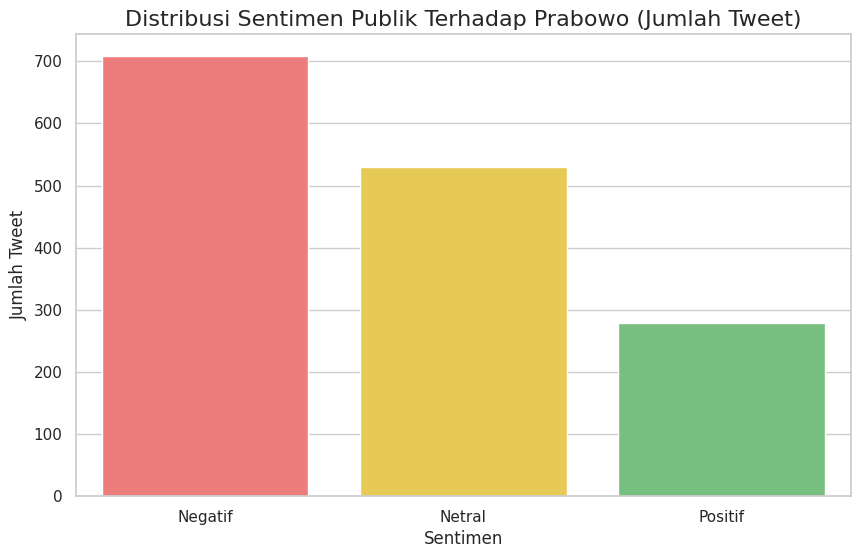

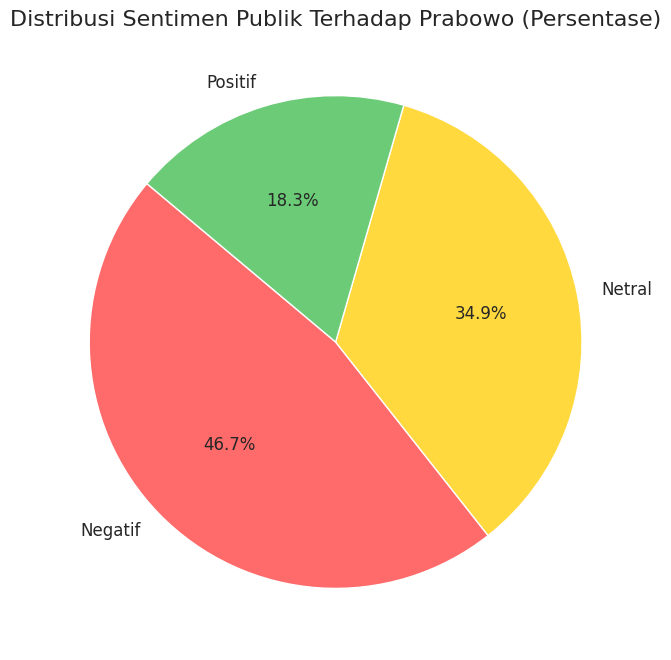


--- Langkah 5: Contoh Cuitan dari Setiap Kategori Sentimen ---

[+] Contoh Tweet Positif:
                                                                                                                                      full_text
5   @cakimiNOW @prabowo Semoga dengan sinergitas bisa mengentaskan kemiskinan.. Pak tetangga saya termasuk orang ada tp masih mendapatkan PKH..
9                                                                       @Dahnilanzar @prabowo Semoga Saudara Ku menjaga AMANAH dgn BAIK aamiin 
10                                                                                                         ya Allah lindungi kami dari Prabowo 

[-] Contoh Tweet Negatif:
                                                                                          full_text
0  @jokoanwar Boleh kali pak @prabowo langsung reshuffle lagi.. yang ini yaaa liat sendiri paaaak..
1        @DarsAlexandra1 @prabowo itu kelewat 'tersandera' oleh kelompok Joko. Macan pun jd kucing.
2     

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

print("Memulai proses analisis sentimen...\n")

# --- LANGKAH 1: MEMUAT DAN MEMERIKSA DATA ---
print("--- Langkah 1: Memuat dan Memeriksa Data ---")
try:
    df = pd.read_csv('prabowo.csv', lineterminator='\n')
    df.columns = df.columns.str.strip()
    print("File 'prabowo.csv' berhasil dimuat.")
    print(f"Jumlah total tweet sebelum dibersihkan: {len(df)}")
except FileNotFoundError:
    print("ERROR: File 'prabowo.csv' tidak ditemukan.")
    exit()

df.dropna(subset=['full_text'], inplace=True)
df.drop_duplicates(subset=['full_text'], keep='first', inplace=True)
print(f"Jumlah tweet setelah menghapus duplikat dan baris kosong: {len(df)}\n")


# --- LANGKAH 2: PEMBERSIHAN DAN PEMROSESAN TEKS ---
print("--- Langkah 2: Pembersihan dan Pemrosesan Teks ---")
alay_dict = {
    'yg': 'yang', 'ga': 'tidak', 'gak': 'tidak', 'gaktau': 'tidak tahu',
    'bgmn': 'bagaimana', 'sdh': 'sudah', 'utk': 'untuk', 'dg': 'dengan',
    'bkn': 'bukan', 'krn': 'karena', 'aja': 'saja', 'blm': 'belum',
    'dgn': 'dengan', 'jg': 'juga', 'jd': 'jadi', 'sm': 'sama', 'lg': 'lagi'
}
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9_]+', ' ', text)
    text = re.sub(r'#\w+', ' ', text)
    text = re.sub(r'http\S+|www\S+', ' ', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    words = text.split()
    normalized_words = [alay_dict.get(word, word) for word in words]
    text = ' '.join(normalized_words)
    return text.strip()

df['cleaned_text'] = df['full_text'].apply(clean_text)
print("Pembersihan teks selesai. Kolom 'cleaned_text' telah dibuat.\n")


# --- LANGKAH 3: KLASIFIKASI SENTIMEN (METODE MACHINE LEARNING) ---
print("--- Langkah 3: Klasifikasi Sentimen (Metode Machine Learning) ---")
print("Memuat model machine learning... Proses ini mungkin memakan waktu beberapa menit.")
try:
    pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"
    sentiment_classifier = pipeline(
        "sentiment-analysis",
        model=pretrained_name,
        tokenizer=pretrained_name
    )
    print("Model berhasil dimuat.")
except Exception as e:
    print(f"Gagal memuat model. Pastikan library 'transformers' dan 'torch' terinstal.")
    print(f"Error: {e}")
    exit()

sentiments = sentiment_classifier(df['cleaned_text'].tolist(), truncation=True)
print("Klasifikasi sentimen untuk semua tweet selesai.\n")

label_mapping = {'positive': 'Positif', 'negative': 'Negatif', 'neutral': 'Netral'}
df['sentiment'] = [label_mapping[s['label']] for s in sentiments]


# --- LANGKAH 4: HASIL ANALISIS & VISUALISASI ---
print("--- Langkah 4: Hasil Analisis & Visualisasi ---")
sentiment_counts = df['sentiment'].value_counts()
total_tweets = len(df)
sentiment_percentages = (sentiment_counts / total_tweets) * 100

print("Hasil Agregat Analisis Sentimen:")
print(sentiment_counts)
print("\nPersentase Sentimen:")
print(sentiment_percentages.round(2))

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#FF6B6B', '#FFD93D', '#6BCB77'], order=['Negatif', 'Netral', 'Positif'])
plt.title('Distribusi Sentimen Publik Terhadap Prabowo (Jumlah Tweet)', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
plt.xticks(fontsize=11)
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['#FF6B6B', '#FFD93D', '#6BCB77'], textprops={'fontsize': 12})
plt.title('Distribusi Sentimen Publik Terhadap Prabowo (Persentase)', fontsize=16)
plt.ylabel('')
plt.show()


# --- LANGKAH 5: MENAMPILKAN CONTOH TWEET ---
print("\n--- Langkah 5: Contoh Cuitan dari Setiap Kategori Sentimen ---")

# Mengatur agar lebar kolom 'full_text' ditampilkan sepenuhnya
pd.set_option('display.max_colwidth', None)

# Menampilkan 3 contoh tweet untuk setiap kategori
print("\n[+] Contoh Tweet Positif:")
print(df[df['sentiment'] == 'Positif'][['full_text']].head(3))

print("\n[-] Contoh Tweet Negatif:")
print(df[df['sentiment'] == 'Negatif'][['full_text']].head(3))

print("\n[=] Contoh Tweet Netral:")
print(df[df['sentiment'] == 'Netral'][['full_text']].head(3))


# --- LANGKAH 6: KESIMPULAN ANALISIS ---
print("\n--- Langkah 6: Kesimpulan Tren Opini Publik ---")
dominant_sentiment = sentiment_counts.idxmax()
dominant_percentage = sentiment_percentages.max()

print(f"Berdasarkan analisis {total_tweets} tweet, sentimen publik terhadap Prabowo didominasi oleh sentimen {dominant_sentiment} sebesar {dominant_percentage:.2f}%.")
print("Isu utama yang mendorong sentimen ini adalah terkait reshuffle kabinet, khususnya pergantian Menteri Keuangan, serta pernyataan publik dari para menteri baru.")
print("Sentimen negatif banyak dipicu oleh skeptisisme terhadap perubahan kabinet dan kritik terhadap gaya komunikasi pejabat, sementara sentimen positif didasari oleh harapan akan kinerja pemerintahan yang lebih baik dan amanah.")


# --- LANGKAH 7: PENYIMPANAN HASIL ---
output_filename = 'prabowo_sentimen_analisis.csv'
df.to_csv(output_filename, index=False, encoding='utf-8-sig')
print(f"\n--- Proses Selesai ---")
print(f"Hasil analisis lengkap telah disimpan dalam file: '{output_filename}'")